# Scraping full data from "futwiz" website

In [97]:
## Importing libraries, we will use BeautifulSoup library

### Imports

In [2]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd 
import urllib.parse 

### HTTP Request

#### store website in variable

In [99]:
website = 'https://www.futwiz.com/en/fifa23/players?page=1'

#### Get Request

In [100]:
response = requests.get(website)

#### Status Code : to check if it works

In [101]:
response.status_code

200

### Soup Object 

In [102]:
soup = BeautifulSoup(response.content, 'html.parser')

### Results

In [103]:
result_container = soup.find_all('tr', {'class':'table-row'})

In [104]:
len(result_container) # check the result on the website page

25

#### To scrap all the player stats we neet to enter each page one by one; to do so we need to have the links of all the payers links:


 So let's do that shall we!!

In [105]:
#results_update = result_container

In [106]:
#len(results_update) 

#### The url is composted from two parts: 1st is https://www.futwiz.com/ and 2ed is :en/fifa22/player/pele/17068

#### URL Part 1

In [107]:
url_part_1 = 'https://www.futwiz.com/'

#### Create List for URL Part 2 to get the second link

In [108]:
url_part_2 = []

for item in result_container:
    
    for link in item.find_all('td', {'class':'face'}):
        url_part_2.append(link.find('a').get('href'))

In [109]:
len(url_part_2) # the same as our result, Good

25

#### Let's join Url 1 and Url 2

In [110]:
url_joined = []

for link_2 in url_part_2:
    url_joined.append(urllib.parse.urljoin(url_part_1,link_2))

In [111]:
url_joined

['https://www.futwiz.com/en/fifa23/player/kylian-mbappe/19190',
 'https://www.futwiz.com/en/fifa23/player/lionel-messi/17392',
 'https://www.futwiz.com/en/fifa23/player/ronaldinho/1401',
 'https://www.futwiz.com/en/fifa23/player/johan-cruyff/1400',
 'https://www.futwiz.com/en/fifa23/player/lev-yashin/1399',
 'https://www.futwiz.com/en/fifa23/player/ferenc-puskas/1351',
 'https://www.futwiz.com/en/fifa23/player/paolo-maldini/1350',
 'https://www.futwiz.com/en/fifa23/player/garrincha/1349',
 'https://www.futwiz.com/en/fifa23/player/ronaldo-nazario/1125',
 'https://www.futwiz.com/en/fifa23/player/zinedine-zidane/1124',
 'https://www.futwiz.com/en/fifa23/player/gerd-muller/171',
 'https://www.futwiz.com/en/fifa23/player/sadio-mane/19498',
 'https://www.futwiz.com/en/fifa23/player/gareth-bale/19457',
 'https://www.futwiz.com/en/fifa23/player/hugo-sanchez/19452',
 'https://www.futwiz.com/en/fifa23/player/javier-zanetti/19443',
 'https://www.futwiz.com/en/fifa23/player/andrea-pirlo/19442',
 '

In [112]:
len(url_joined) #GOOD

25

### Now let's get data from first link 

These are the attributes we are interested in :
Player 
Skills 
Weakfoot
Workrate
Xbox_Price 
PS4_5_Price 
Pc_Price 
Pac 
Acceleration 
Sprint_speed 
Shoot 
Pass 
Drible 
Defense 
Physic 
Position 

#### Store first link in variable

In [113]:
first_link = url_joined[0]

In [114]:
first_link

'https://www.futwiz.com/en/fifa23/player/kylian-mbappe/19190'

#### Get Request & Soup Object

In [123]:
response = requests.get(first_link)

In [124]:
soup = BeautifulSoup(response.content, 'html.parser')

In [125]:
#### Let's find where the player attributes stored in:

In [128]:
player_attr = soup.find_all('div', {'class':'playerprofile-info text-center'})

In [129]:
player_attr

[<div class="player-stats-display">
 <h3>Kylian Mbappe 94 World Cup TOTT In Game Stats</h3>
 <hr/>
 <div class="player-info-desktop">
 <div class="player-info-bar">
 <div class="player-info-stat">
 <div>LW</div>
 <div>Pos</div>
 </div>
 <div class="player-info-stat">
 <div>RM</div>
 <div>Alt. Pos</div>
 </div>
 <div class="player-info-stat">
 <div>LM</div>
 <div>Alt. Pos</div>
 </div>
 <div class="player-info-stat">
 <div>CAM</div>
 <div>Alt. Pos</div>
 </div>
 <div class="player-info-stat">
 <div>5 <span style="font-size: 10px;color:#FFE62D"><i class="fa fa-star"></i></span></div>
 <div>Skills</div>
 </div>
 <div class="player-info-stat">
 <div>4 <span style="font-size: 10px;color:#FFE62D"><i class="fa fa-star"></i></span></div>
 <div>W/F</div>
 </div>
 <div class="player-info-stat">
 <div>HIGH/LOW</div>
 <div>W/R</div>
 </div>
 <div class="player-info-stat">
 <div>Right</div>
 <div>Foot</div>
 </div>
 <div class="player-info-stat">
 <div>23</div>
 <div>Age</div>
 </div>
 <div class="

#### Let's extract all the attributes :

#### Player Name

In [135]:
soup.find('div', {'class':'pname-h1'}).h1.text

'Kylian Mbappe FIFA 23 World Cup TOTT '

#### SKILLS

In [142]:
soup.find_all('div', {'class':'player-info-stat'})[0].div.text

'5 '

#### WEAKFOOT

In [148]:
soup.find_all('div', {'class':'player-info-stat'})[1].div.text

'4 '

#### WORKRATES

In [149]:
soup.find_all('div', {'class':'player-info-stat'})[2].div.text

'H/L'

#### PS_Xbox_Price

In [157]:
soup.find_all('div', {'price-num'})[0].get_text()

'5,923,000'

#### PC_Price

In [158]:
soup.find_all('div', {'price-num'})[1].get_text()

'6,700,000'

#### PAC

In [161]:
soup.find('div', {'class':'highestbarcolour att1bar'}).get_text()

'99'

#### Acceleration

In [162]:
soup.find('div', {'class':'individual-stat-bar-stat textcolour accelerationstat'}).get_text()

'99'

#### Sprint Speed

In [168]:
soup.find('div', {'class':"individual-stat-bar-stat textcolour sprintspeedstat"}).get_text()

'99'

#### SHO

In [169]:
soup.find('div', {'class':"highestbarcolour att2bar"}).get_text()

'92'

#### PASS

In [171]:
soup.find('div', {'class':"highestbarcolour att3bar"}).get_text()

'85'

#### DRI

In [172]:
soup.find('div', {'class':"highestbarcolour att4bar"}).get_text()

'95'

#### Def

In [173]:
soup.find('div', {'class':"lowbarcolour att5bar"}).get_text()

'40'

#### Physics

In [174]:
soup.find('div', {'class':"highestbarcolour att6bar"}).get_text()

'82'

#### Position

In [194]:
soup.find('div', {'class':"player-info-bar"}).findNext('div').findNext('div').get_text()

'LW'

### Put all together and loop through all results of the 1st 09 pages:

In [214]:
Player = []
Skill = []
Weakfoot = []
Workrates = []
Xbox_Price = []
PS4_5_Price = []
Pc_Price = []
Pac = []
Acceleration = []
Sprint_speed = []
Shoot = []
Pass = []
Dri = []
Def = []
Phy = []
Position = []

# url part 1
page=1


while page < 11:   # We can scrap more pages by changing the number. 
    # website
   
    website = f'https://www.futwiz.com/en/fifa23/players?page={page}'
    page = page +1
    response = requests.get(website)
    soup = BeautifulSoup(response.content, 'html.parser')
    result_container = soup.find_all('tr', {'class':'table-row'})
    url_part_1 = 'https://www.futwiz.com/'
    url_part_2 = []
    
    results_update = result_container
    
    for item in results_update:

        for link in item.find_all('td', {'class':'face'}):
            url_part_2.append(link.find('a').get('href'))
            
    url_joined = []

    for link_2 in url_part_2:
        url_joined.append(urllib.parse.urljoin(url_part_1,link_2))
        
    
    
    for link in url_joined:
        response = requests.get(link)
    
        # create soup object
        soup = BeautifulSoup(response.content, 'html.parser')


        # Player 
        try:
            Player.append(soup.find('div', {'class':'pname-h1'}).h1.text)
        except:
            Player.append('')

        # Skill 
        try:
            Skill.append(soup.find_all('div', {'class':'player-info-stat'})[0].div.text)
        except:
            Skill.append('')

        # Weakfoot 
        try:
            Weakfoot.append(soup.find_all('div', {'class':'player-info-stat'})[1].div.text)
        except:
            Weakfoot.append('')

        # Workrates 
        try:
            Workrates.append(soup.find_all('div', {'class':'player-info-stat'})[2].div.text)
        except:
            Workrates.append('')


        # Xbox_price_ps 
        try:
            Xbox_Price.append(soup.find_all('div', {'price-num'})[0].get_text())
        except:
            Xbox_Price.append('')


        # PC_price 
        try:
            Pc_Price.append(soup.find_all('div', {'price-num'})[1].get_text())
        except:
            Pc_Price.append('')

        # Pac 
        try:
            Pac.append(soup.find('div', {'class':'highestbarcolour att1bar'}).get_text())
        except:
            Pac.append('')

        # Acceleration 
        try:
            Acceleration.append(soup.find('div', {'class':'individual-stat-bar-stat textcolour accelerationstat'}).get_text())
        except:
            Acceleration.append('')


        # Sprint
        try:
            Sprint_speed.append(soup.find('div', {'class':"individual-stat-bar-stat textcolour sprintspeedstat"}).get_text())
        except:
            Sprint_speed.append('')

        # Shoot
        try:
            Shoot.append(soup.find('div', {'class':"highestbarcolour att2bar"}).get_text())
        except:
            Shoot.append('')


        # Pass
        try:
            Pass.append(soup.find('div', {'class':"highestbarcolour att3bar"}).get_text())
        except:
            Pass.append('')


        # Dri
        try:
            Dri.append(soup.find('div', {'class':"highestbarcolour att4bar"}).get_text())
        except:
            Dri.append('')


        # Def
        try:
            Def.append(soup.find('div', {'class':"lowbarcolour att5bar"}).get_text())
        except:
            Def.append('')


        # Phy
        try:
            Phy.append(soup.find('div', {'class':"highestbarcolour att6bar"}).get_text())
        except:
            Phy.append('')

        # Position
        try:
            Position.append(soup.find('div', {'class':"player-info-bar"}).findNext('div').findNext('div').get_text())
        except:
            Position.append('')

        
        # create a dictionary with results
        Output = {'Player' : Player, 'Skill' : Skill, 'Weakfoot':Weakfoot, 'Workrates':Workrates, 'PS_Xbox_Price':Xbox_Price, 'Pc_Price':Pc_Price, 'Pac':Pac, 'Acceleration':Acceleration,'Sprint_speed':Sprint_speed,'Shoot':Shoot,'Pass':Pass, 'Dri':Dri, 'Phy':Phy,'Def':Def,'Position':Position }

In [215]:
Output

{'Player': ['Kylian Mbappe FIFA 23 World Cup TOTT ',
  'Lionel Messi FIFA 23 Champions League Live ',
  'Ronaldinho FIFA 23 Icon ',
  'Johan Cruyff FIFA 23 Icon ',
  'Lev Yashin FIFA 23 Icon ',
  'Ferenc Puskas FIFA 23 Icon ',
  'Paolo Maldini FIFA 23 Icon ',
  'Garrincha FIFA 23 Icon ',
  'Ronaldo Nazario FIFA 23 Icon ',
  'Zinedine Zidane FIFA 23 Icon ',
  'Gerd Muller FIFA 23 Icon ',
  'Sadio Mane FIFA 23 Flashback ',
  'Gareth Bale FIFA 23 SBC Special ',
  'Hugo Sanchez FIFA 23 TOTY Icon ',
  'Javier Zanetti FIFA 23 TOTY Icon ',
  'Andrea Pirlo FIFA 23 TOTY Icon ',
  'Mohamed Salah FIFA 23 Centurions ',
  'Kevin De Bruyne FIFA 23 Winter Wildcard ',
  'Garrincha FIFA 23 World Cup Icon ',
  'Kylian Mbappe FIFA 23 Road to World Cup ',
  'Robert Lewandowski FIFA 23 Ones To Watch ',
  'George Best FIFA 23 Icon ',
  'Carlos Alberto Torres FIFA 23 Icon ',
  'Ruud Gullit FIFA 23 Icon ',
  'Franco Baresi FIFA 23 Icon ',
  'Lothar Matthaus FIFA 23 Icon ',
  'Marco van Basten FIFA 23 Icon ',


#### Let's put the result in a data frame

In [216]:
df = pd.DataFrame(Output)
df

,Player,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pac,Acceleration,Sprint_speed,Shoot,Pass,Dri,Phy,Def,Position
0,Kylian Mbappe FIFA 23 World Cup TOTT,5,4,H/L,"5,900,000","6,700,000",99,99,99,92,85,95,82,40,LW
1,Lionel Messi FIFA 23 Champions League Live,4,4,L/L,"1,609,000","2,199,000",85,91,80,92,94,97,,37,RW
2,Ronaldinho FIFA 23 Icon,5,4,H/L,"5,142,000","7,000,000",92,94,91,90,91,95,81,37,LW
3,Johan Cruyff FIFA 23 Icon,5,5,H/L,"3,730,000","4,200,000",91,93,89,92,91,94,,42,CF
4,Lev Yashin FIFA 23 Icon,1,3,M/M,"725,000","920,000",95,65,53,89,,96,95,,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Hernan Crespo FIFA 23 Icon,4,4,M/L,"198,000","200,000",89,89,89,90,,89,,38,ST
221,Henrik Larsson FIFA 23 Icon,3,4,M/M,"158,000","112,000",90,92,88,89,,85,,48,ST
222,Rio Ferdinand FIFA 23 Icon,3,3,M/M,"562,000","569,000",83,84,82,,,,86,,CB
223,Davor Suker FIFA 23 Icon,4,4,H/L,"130,000","155,000",85,84,86,91,82,91,,45,ST


#### Let's store the data in csv file:

In [217]:
df.to_csv('Fifa_23_Output')

# Exploring & Cleaning the Data

In [98]:
df = pd.read_csv('Fifa_23_Output')

In [99]:
df.head(5)

,Unnamed: 0,Player,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pac,Acceleration,Sprint_speed,Shoot,Pass,Dri,Phy,Def,Position
0,0,Kylian Mbappe FIFA 23 World Cup TOTT,5.0,4.0,H/L,"5,900,000","6,700,000",99.0,99.0,99.0,92.0,85.0,95.0,82.0,40.0,LW
1,1,Lionel Messi FIFA 23 Champions League Live,4.0,4.0,L/L,"1,609,000","2,199,000",85.0,91.0,80.0,92.0,94.0,97.0,NaN,37.0,RW
2,2,Ronaldinho FIFA 23 Icon,5.0,4.0,H/L,"5,142,000","7,000,000",92.0,94.0,91.0,90.0,91.0,95.0,81.0,37.0,LW
3,3,Johan Cruyff FIFA 23 Icon,5.0,5.0,H/L,"3,730,000","4,200,000",91.0,93.0,89.0,92.0,91.0,94.0,NaN,42.0,CF
4,4,Lev Yashin FIFA 23 Icon,1.0,3.0,M/M,"725,000","920,000",95.0,65.0,53.0,89.0,NaN,96.0,95.0,NaN,GK


In [100]:
# Let's drop the Unnamed column:
df.drop(['Unnamed: 0'], axis=1,inplace = True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         220 non-null    object 
 1   Skill          220 non-null    float64
 2   Weakfoot       220 non-null    float64
 3   Workrates      220 non-null    object 
 4   PS_Xbox_Price  220 non-null    object 
 5   Pc_Price       220 non-null    object 
 6   Pac            174 non-null    float64
 7   Acceleration   220 non-null    float64
 8   Sprint_speed   220 non-null    float64
 9   Shoot          170 non-null    float64
 10  Pass           154 non-null    float64
 11  Dri            188 non-null    float64
 12  Phy            110 non-null    float64
 13  Def            114 non-null    float64
 14  Position       220 non-null    object 
dtypes: float64(10), object(5)
memory usage: 26.5+ KB


In [102]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Skill,220.0,3.636364,1.112218,1.0,3.00,4.0,4.00,5.0
Weakfoot,220.0,3.890909,0.693683,2.0,3.00,4.0,4.00,5.0
Pac,174.0,88.528736,4.432771,81.0,85.00,89.0,92.00,99.0
Acceleration,220.0,84.122727,10.591132,40.0,79.00,86.0,92.00,99.0
Sprint_speed,220.0,83.459091,10.321904,39.0,80.00,85.0,90.00,99.0
Shoot,170.0,89.100000,3.114482,82.0,87.00,89.0,92.00,96.0
Pass,154.0,87.415584,3.727133,81.0,85.00,88.0,90.00,96.0
Dri,188.0,89.430851,3.607850,81.0,87.00,90.0,92.00,99.0
Phy,110.0,86.272727,3.951330,81.0,83.00,86.0,89.75,99.0
Def,114.0,41.631579,4.877732,30.0,37.25,41.5,45.75,50.0


In [103]:
df.isnull().sum()

Player             5
Skill              5
Weakfoot           5
Workrates          5
PS_Xbox_Price      5
Pc_Price           5
Pac               51
Acceleration       5
Sprint_speed       5
Shoot             55
Pass              71
Dri               37
Phy              115
Def              111
Position           5
dtype: int64

In [104]:
df.dtypes

Player            object
Skill            float64
Weakfoot         float64
Workrates         object
PS_Xbox_Price     object
Pc_Price          object
Pac              float64
Acceleration     float64
Sprint_speed     float64
Shoot            float64
Pass             float64
Dri              float64
Phy              float64
Def              float64
Position          object
dtype: object

### Let's do some data Cleaning & transformation

> Separating the player name from the quality, ex: Kylian Mbappe FIFA 23 World Cup TOTT: Kylian Mbappe + FIFA 23 World Cup TOTT

In [105]:
df.head(5)

,Player,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pac,Acceleration,Sprint_speed,Shoot,Pass,Dri,Phy,Def,Position
0,Kylian Mbappe FIFA 23 World Cup TOTT,5.0,4.0,H/L,"5,900,000","6,700,000",99.0,99.0,99.0,92.0,85.0,95.0,82.0,40.0,LW
1,Lionel Messi FIFA 23 Champions League Live,4.0,4.0,L/L,"1,609,000","2,199,000",85.0,91.0,80.0,92.0,94.0,97.0,NaN,37.0,RW
2,Ronaldinho FIFA 23 Icon,5.0,4.0,H/L,"5,142,000","7,000,000",92.0,94.0,91.0,90.0,91.0,95.0,81.0,37.0,LW
3,Johan Cruyff FIFA 23 Icon,5.0,5.0,H/L,"3,730,000","4,200,000",91.0,93.0,89.0,92.0,91.0,94.0,NaN,42.0,CF
4,Lev Yashin FIFA 23 Icon,1.0,3.0,M/M,"725,000","920,000",95.0,65.0,53.0,89.0,NaN,96.0,95.0,NaN,GK


In [106]:
df[['Players', 'Quality']] = df['Player'].str.split('FIFA 23', n=1, expand=True)

In [107]:
df.columns

Index(['Player', 'Skill', 'Weakfoot', 'Workrates', 'PS_Xbox_Price', 'Pc_Price',
       'Pac', 'Acceleration', 'Sprint_speed', 'Shoot', 'Pass', 'Dri', 'Phy',
       'Def', 'Position', 'Players', 'Quality'],
      dtype='object')

> Changing the columns order

In [108]:
new_order = ['Player', 'Players', 'Quality', 'Skill', 'Weakfoot', 'Workrates', 'PS_Xbox_Price', 'Pc_Price',
       'Pac', 'Acceleration', 'Sprint_speed', 'Shoot', 'Pass', 'Dri', 'Phy',
       'Def', 'Position']

In [109]:
df = df[new_order]

> Drop the extra Player column

In [110]:
df.drop(['Player'], axis=1,inplace = True)

In [111]:
df.head(5)

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pac,Acceleration,Sprint_speed,Shoot,Pass,Dri,Phy,Def,Position
0,Kylian Mbappe,World Cup TOTT,5.0,4.0,H/L,"5,900,000","6,700,000",99.0,99.0,99.0,92.0,85.0,95.0,82.0,40.0,LW
1,Lionel Messi,Champions League Live,4.0,4.0,L/L,"1,609,000","2,199,000",85.0,91.0,80.0,92.0,94.0,97.0,NaN,37.0,RW
2,Ronaldinho,Icon,5.0,4.0,H/L,"5,142,000","7,000,000",92.0,94.0,91.0,90.0,91.0,95.0,81.0,37.0,LW
3,Johan Cruyff,Icon,5.0,5.0,H/L,"3,730,000","4,200,000",91.0,93.0,89.0,92.0,91.0,94.0,NaN,42.0,CF
4,Lev Yashin,Icon,1.0,3.0,M/M,"725,000","920,000",95.0,65.0,53.0,89.0,NaN,96.0,95.0,NaN,GK


In [112]:
df.dtypes

Players           object
Quality           object
Skill            float64
Weakfoot         float64
Workrates         object
PS_Xbox_Price     object
Pc_Price          object
Pac              float64
Acceleration     float64
Sprint_speed     float64
Shoot            float64
Pass             float64
Dri              float64
Phy              float64
Def              float64
Position          object
dtype: object

> Changing data types of columns: PS_Xbox_Price, Pc_Price

let's replace . by '' first than convert them to numeric values

In [113]:
df['PS_Xbox_Price']= df['PS_Xbox_Price'].str.replace(',','')
df['Pc_Price'] = df['Pc_Price'].str.replace(',','')

In [114]:
df['PS_Xbox_Price']= pd.to_numeric(df['PS_Xbox_Price'])
df['Pc_Price'] = pd.to_numeric(df['Pc_Price'])

In [115]:
# New Data types
df.dtypes

Players           object
Quality           object
Skill            float64
Weakfoot         float64
Workrates         object
PS_Xbox_Price    float64
Pc_Price         float64
Pac              float64
Acceleration     float64
Sprint_speed     float64
Shoot            float64
Pass             float64
Dri              float64
Phy              float64
Def              float64
Position          object
dtype: object

In [116]:
df.sample(10)

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pac,Acceleration,Sprint_speed,Shoot,Pass,Dri,Phy,Def,Position
126,Bastian Schweinsteiger,Icon,3.0,3.0,H/H,278000.0,300000.0,NaN,74.0,77.0,86.0,89.0,86.0,86.0,NaN,CM
110,Karim Benzema,World Cup,4.0,4.0,M/M,0.0,0.0,NaN,79.0,80.0,88.0,83.0,87.0,NaN,39.0,CF
148,Johan Cruyff,Icon,5.0,5.0,H/L,2310000.0,2560000.0,91.0,93.0,89.0,89.0,88.0,93.0,NaN,41.0,CF
89,Nemanja Vidic,TOTY Icon,2.0,3.0,M/H,1306000.0,1600000.0,84.0,82.0,85.0,NaN,NaN,NaN,92.0,NaN,CB
68,Dennis Bergkamp,Icon,4.0,4.0,H/M,230000.0,215000.0,84.0,85.0,83.0,91.0,86.0,90.0,NaN,37.0,CF
11,Sadio Mane,Flashback,4.0,4.0,H/M,0.0,0.0,94.0,95.0,94.0,88.0,86.0,92.0,83.0,49.0,LW
175,Harry Kane,Inform,3.0,5.0,H/H,59000.0,65000.0,NaN,69.0,71.0,92.0,84.0,84.0,83.0,48.0,ST
159,Robin van Persie,Icon,4.0,4.0,H/L,258000.0,285000.0,85.0,86.0,85.0,94.0,87.0,90.0,NaN,46.0,ST
27,Thierry Henry,Icon,4.0,4.0,M/M,1410000.0,1469000.0,94.0,94.0,94.0,91.0,83.0,90.0,NaN,NaN,ST
191,Didier Drogba,World Cup Icon,4.0,5.0,H/H,779000.0,980000.0,88.0,89.0,87.0,91.0,NaN,81.0,89.0,47.0,ST


> New: Let's change the names of some columns:

In [117]:
df.rename(columns={'Pac': 'Pace','Dri': 'Dribble','Phy':'Physics','Def':'Defense'},inplace = True)

## Dealing with missing values:

#### We have some missing value we need to deal with:

Let's fill the null of the Pace colum by the mean of the Workrates to a better representation of the data. 

In [118]:
df.isnull().sum()

Players            5
Quality            5
Skill              5
Weakfoot           5
Workrates          5
PS_Xbox_Price      5
Pc_Price           5
Pace              51
Acceleration       5
Sprint_speed       5
Shoot             55
Pass              71
Dribble           37
Physics          115
Defense          111
Position           5
dtype: int64

In [119]:
df[df['Pace'].isnull()]

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
17,Kevin De Bruyne,Winter Wildcard,4.0,5.0,H/H,1330000.0,1840000.0,NaN,79.0,76.0,90.0,95.0,90.0,99.0,NaN,CM
20,Robert Lewandowski,Ones To Watch,4.0,4.0,H/M,225000.0,368000.0,NaN,80.0,79.0,93.0,82.0,88.0,85.0,47.0,ST
24,Franco Baresi,Icon,2.0,3.0,M/H,215000.0,220000.0,NaN,64.0,74.0,NaN,NaN,NaN,82.0,NaN,CB
34,Xabi Alonso,TOTY Icon,4.0,4.0,H/H,0.0,0.0,NaN,80.0,80.0,83.0,92.0,86.0,85.0,NaN,CDM
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,Robert Lewandowski,La Liga POTM,4.0,4.0,H/M,0.0,0.0,NaN,78.0,77.0,92.0,81.0,87.0,84.0,45.0,ST
56,Kevin De Bruyne,Inform,4.0,5.0,H/H,329000.0,451000.0,NaN,77.0,74.0,89.0,94.0,88.0,NaN,NaN,CM
57,Alessandro Nesta,Icon,2.0,3.0,M/H,260000.0,264000.0,NaN,74.0,70.0,NaN,NaN,NaN,86.0,NaN,CB
62,David Beckham,Icon,3.0,3.0,H/H,620000.0,700000.0,NaN,77.0,82.0,87.0,95.0,88.0,82.0,NaN,RM
64,Puyol,Icon,2.0,3.0,M/H,260000.0,259000.0,NaN,69.0,70.0,NaN,NaN,NaN,90.0,NaN,CB


In [120]:
mean_by_position = df.groupby('Position')['Pace'].mean()
mean_by_position

Position
CAM    86.000000
CB     83.181818
CDM    86.666667
CF     89.928571
CM     84.071429
GK     89.666667
LB     90.750000
LM     90.571429
LW     92.545455
RB     89.000000
RM     91.000000
RW     89.333333
RWB    92.000000
ST     89.482143
Name: Pace, dtype: float64

In [121]:
df['Pace'].fillna(df.groupby('Position')['Pace'].transform('mean'), inplace=True)

Le's Check the result first

In [122]:
df.loc[[17]]

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
17,Kevin De Bruyne,Winter Wildcard,4.0,5.0,H/H,1330000.0,1840000.0,84.071429,79.0,76.0,90.0,95.0,90.0,99.0,NaN,CM


Let's do that with other columns:

In [123]:
df['Shoot'].fillna(df.groupby('Position')['Shoot'].transform('mean'), inplace=True)
df['Pass'].fillna(df.groupby('Position')['Pass'].transform('mean'), inplace=True)
df['Dribble'].fillna(df.groupby('Position')['Dribble'].transform('mean'), inplace=True)
df['Physics'].fillna(df.groupby('Position')['Physics'].transform('mean'), inplace=True)
df['Defense'].fillna(df.groupby('Position')['Defense'].transform('mean'), inplace=True)

In [124]:
df.isna().sum()

Players           5
Quality           5
Skill             5
Weakfoot          5
Workrates         5
PS_Xbox_Price     5
Pc_Price          5
Pace              5
Acceleration      5
Sprint_speed      5
Shoot            13
Pass              5
Dribble          27
Physics           5
Defense          78
Position          5
dtype: int64

> Let's explore the null values of the column with 5 null rows

In [125]:
df[df['Players'].isna()]

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It's looks like we have 5 empty rows, let's drop them:

In [126]:
# Let's drop the Nan value of Player column:
df.dropna(subset=['Players'], inplace=True)

In [127]:
df.isna().sum()

Players           0
Quality           0
Skill             0
Weakfoot          0
Workrates         0
PS_Xbox_Price     0
Pc_Price          0
Pace              0
Acceleration      0
Sprint_speed      0
Shoot             8
Pass              0
Dribble          22
Physics           0
Defense          73
Position          0
dtype: int64

Let's investigate the Dribble and Defense Columns 

In [128]:
df[df['Defense'].isna()]

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
6,Paolo Maldini,Icon,2.0,4.0,M/H,1529000.0,2070000.0,86.000000,85.0,86.0,88.000000,86.0,NaN,83.0,NaN,CB
14,Javier Zanetti,TOTY Icon,3.0,4.0,H/H,1185000.0,2000000.0,90.000000,89.0,91.0,NaN,90.0,86.00,84.0,NaN,RB
15,Andrea Pirlo,TOTY Icon,5.0,4.0,M/M,723000.0,840000.0,82.000000,83.0,81.0,84.000000,96.0,93.00,86.4,NaN,CM
17,Kevin De Bruyne,Winter Wildcard,4.0,5.0,H/H,1330000.0,1840000.0,84.071429,79.0,76.0,90.000000,95.0,90.00,99.0,NaN,CM
22,Carlos Alberto Torres,Icon,3.0,4.0,M/M,995000.0,1151000.0,90.000000,91.0,90.0,NaN,81.0,86.00,87.0,NaN,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,Nemanja Vidic,Icon,2.0,2.0,M/H,372000.0,367000.0,83.181818,76.0,79.0,88.000000,86.0,NaN,91.0,NaN,CB
217,Roy Keane,Icon,2.0,3.0,M/H,115000.0,99000.0,84.071429,70.0,73.0,86.777778,85.0,81.00,89.0,NaN,CM
218,Frank Rijkaard,Icon,3.0,4.0,M/M,260000.0,260000.0,86.666667,75.0,78.0,84.250000,83.0,85.25,87.0,NaN,CDM
222,Rio Ferdinand,Icon,3.0,3.0,M/M,562000.0,569000.0,83.000000,84.0,82.0,88.000000,86.0,NaN,86.0,NaN,CB


In [129]:
df[df['Dribble'].isna()]

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
6,Paolo Maldini,Icon,2.0,4.0,M/H,1529000.0,2070000.0,86.000000,85.0,86.0,88.0,86.0,NaN,83.000000,NaN,CB
24,Franco Baresi,Icon,2.0,3.0,M/H,215000.0,220000.0,83.181818,64.0,74.0,88.0,86.0,NaN,82.000000,NaN,CB
42,Virgil van Dijk,World Cup Stories,2.0,3.0,M/H,1148000.0,1470000.0,83.000000,71.0,93.0,88.0,86.0,NaN,88.000000,NaN,CB
57,Alessandro Nesta,Icon,2.0,3.0,M/H,260000.0,264000.0,83.181818,74.0,70.0,88.0,86.0,NaN,86.000000,NaN,CB
64,Puyol,Icon,2.0,3.0,M/H,260000.0,259000.0,83.181818,69.0,70.0,88.0,86.0,NaN,90.000000,NaN,CB
69,Bobby Moore,Icon,2.0,3.0,M/M,187000.0,153000.0,83.181818,69.0,68.0,88.0,83.0,NaN,85.000000,NaN,CB
79,Paolo Maldini,Icon,2.0,4.0,M/H,680000.0,806000.0,82.000000,82.0,82.0,88.0,86.0,NaN,81.000000,NaN,CB
85,Kalidou Koulibaly,TOTY Honourable Mention,2.0,4.0,M/H,540000.0,629000.0,85.000000,77.0,91.0,88.0,86.0,NaN,90.000000,NaN,CB
88,Sergio Ramos,Flashback,3.0,3.0,H/M,0.0,0.0,83.000000,90.0,77.0,88.0,86.0,NaN,88.000000,NaN,CB
89,Nemanja Vidic,TOTY Icon,2.0,3.0,M/H,1306000.0,1600000.0,84.000000,82.0,85.0,88.0,86.0,NaN,92.000000,NaN,CB


In [130]:
df[df['Position'] == 'RB']

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
14,Javier Zanetti,TOTY Icon,3.0,4.0,H/H,1185000.0,2000000.0,90.0,89.0,91.0,NaN,90.000000,86.0,84.000000,NaN,RB
22,Carlos Alberto Torres,Icon,3.0,4.0,M/M,995000.0,1151000.0,90.0,91.0,90.0,NaN,81.000000,86.0,87.000000,NaN,RB
47,Cafu,World Cup Icon,4.0,4.0,H/M,0.0,0.0,91.0,92.0,91.0,NaN,85.000000,88.0,85.000000,NaN,RB
73,Javier Zanetti,Icon,2.0,4.0,H/H,585000.0,625000.0,86.0,85.0,87.0,NaN,88.000000,85.0,81.000000,NaN,RB
101,Puyol,World Cup Icon,2.0,3.0,M/H,0.0,0.0,89.0,74.0,76.0,NaN,87.166667,86.0,91.000000,NaN,RB
141,Phillip Lahm,Icon,3.0,3.0,H/M,613000.0,620000.0,87.0,88.0,86.0,NaN,87.000000,87.0,84.833333,NaN,RB
176,Trent Alexander-Arnold,Centurions,4.0,4.0,H/M,340000.0,340000.0,90.0,90.0,90.0,NaN,92.000000,84.0,81.000000,NaN,RB


In [131]:
df[df['Position'] == 'CM']

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
15,Andrea Pirlo,TOTY Icon,5.0,4.0,M/M,723000.0,840000.0,82.000000,83.0,81.0,84.000000,96.000000,93.000000,86.4,NaN,CM
17,Kevin De Bruyne,Winter Wildcard,4.0,5.0,H/H,1330000.0,1840000.0,84.071429,79.0,76.0,90.000000,95.000000,90.000000,99.0,NaN,CM
25,Lothar Matthaus,Icon,3.0,4.0,H/H,2165000.0,2600000.0,89.000000,93.0,85.0,89.000000,90.000000,82.000000,85.0,NaN,CM
30,Xavi,Icon,4.0,3.0,H/H,415000.0,471000.0,81.000000,82.0,80.0,86.777778,95.000000,93.000000,86.4,NaN,CM
40,Karim Benzema,Winter Wildcard,5.0,4.0,H/H,1600000.0,2000000.0,83.000000,82.0,83.0,89.000000,87.000000,92.000000,86.0,NaN,CM
56,Kevin De Bruyne,Inform,4.0,5.0,H/H,329000.0,451000.0,84.071429,77.0,74.0,89.000000,94.000000,88.000000,86.4,NaN,CM
72,Andrea Pirlo,Icon,5.0,4.0,M/M,299000.0,289000.0,84.071429,74.0,72.0,86.777778,95.000000,91.000000,86.4,NaN,CM
83,Gavi,Future Stars,4.0,4.0,H/H,585000.0,640000.0,88.000000,89.0,87.0,86.777778,90.000000,92.000000,81.0,NaN,CM
92,Joshua Kimmich,Winter Wildcard,4.0,4.0,H/M,865000.0,950000.0,84.071429,82.0,75.0,86.777778,90.000000,99.000000,81.0,NaN,CM
93,Toni Kroos,Winter Wildcard,5.0,5.0,M/M,0.0,0.0,84.071429,83.0,78.0,85.000000,93.000000,86.000000,86.4,NaN,CM


By Investigating the column Defense and Dribble by Position category,we need to fill the null values with 0.

In [132]:
df['Dribble'].fillna(0, inplace=True)
df['Defense'].fillna(0, inplace=True)
df['Shoot'].fillna(0, inplace=True)

In [133]:
df.isna().sum()

Players          0
Quality          0
Skill            0
Weakfoot         0
Workrates        0
PS_Xbox_Price    0
Pc_Price         0
Pace             0
Acceleration     0
Sprint_speed     0
Shoot            0
Pass             0
Dribble          0
Physics          0
Defense          0
Position         0
dtype: int64

In [134]:
df.dtypes

Players           object
Quality           object
Skill            float64
Weakfoot         float64
Workrates         object
PS_Xbox_Price    float64
Pc_Price         float64
Pace             float64
Acceleration     float64
Sprint_speed     float64
Shoot            float64
Pass             float64
Dribble          float64
Physics          float64
Defense          float64
Position          object
dtype: object

> Let's convert this columns to integer : 

In [135]:
df.Acceleration= df.Acceleration.astype(int)
df.Sprint_speed= df.Sprint_speed.astype(int)
df.Pass= df.Pass.astype(int)
df.Dribble= df.Dribble.astype(int)
df.Physics= df.Physics.astype(int)
df.Defense= df.Defense.astype(int)
df.Pace= df.Pace.astype(int)
df.Shoot= df.Shoot.astype(int)

### Let's run some data exploring and analysis :

In [136]:
df.head(5)

,Players,Quality,Skill,Weakfoot,Workrates,PS_Xbox_Price,Pc_Price,Pace,Acceleration,Sprint_speed,Shoot,Pass,Dribble,Physics,Defense,Position
0,Kylian Mbappe,World Cup TOTT,5.0,4.0,H/L,5900000.0,6700000.0,99,99,99,92,85,95,82,40,LW
1,Lionel Messi,Champions League Live,4.0,4.0,L/L,1609000.0,2199000.0,85,91,80,92,94,97,84,37,RW
2,Ronaldinho,Icon,5.0,4.0,H/L,5142000.0,7000000.0,92,94,91,90,91,95,81,37,LW
3,Johan Cruyff,Icon,5.0,5.0,H/L,3730000.0,4200000.0,91,93,89,92,91,94,91,42,CF
4,Lev Yashin,Icon,1.0,3.0,M/M,725000.0,920000.0,95,65,53,89,86,96,95,46,GK


In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

> few Statics:

In [138]:
# Calculate the mean of each feature
mean = df.mean()

# Calculate the median of each feature
median = df.median()

# Calculate the standard deviation of each feature
std = df.std()


C:\Users\anass.harbouli\AppData\Local\Temp\ipykernel_5524\2686538421.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()
C:\Users\anass.harbouli\AppData\Local\Temp\ipykernel_5524\2686538421.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df.median()
C:\Users\anass.harbouli\AppData\Local\Temp\ipykernel_5524\2686538421.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()


In [141]:
mean

Skill                 3.636364
Weakfoot              3.890909
PS_Xbox_Price    733543.181818
Pc_Price         881127.272727
Pace                 87.850000
Acceleration         84.122727
Sprint_speed         83.459091
Shoot                85.377273
Pass                 86.513636
Dribble              80.331818
Physics              85.454545
Defense              27.877273
dtype: float64

In [142]:
median

Skill                 4.0
Weakfoot              4.0
PS_Xbox_Price    368500.0
Pc_Price         396000.0
Pace                 88.0
Acceleration         86.0
Sprint_speed         85.0
Shoot                88.0
Pass                 86.0
Dribble              89.0
Physics              84.0
Defense              39.0
dtype: float64

In [143]:
std

Skill            1.112218e+00
Weakfoot         6.936826e-01
PS_Xbox_Price    1.010760e+06
Pc_Price         1.311004e+06
Pace             4.288697e+00
Acceleration     1.059113e+01
Sprint_speed     1.032190e+01
Shoot            1.689231e+01
Pass             3.519651e+00
Dribble          2.705556e+01
Physics          3.465779e+00
Defense          2.003031e+01
dtype: float64

> let's find if there's any relationship between Skill rate and Price:

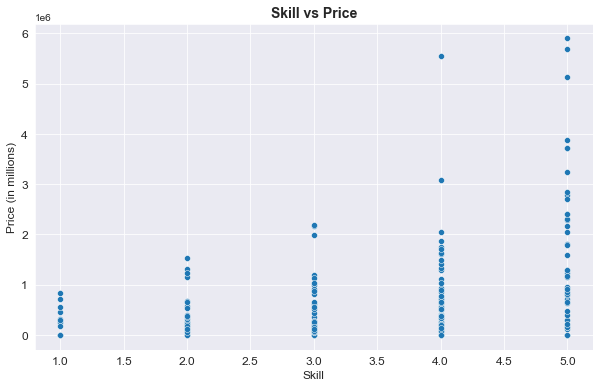

In [144]:
# plot a scatter plot of Skill vs PS_4/5 and Xbox_Price

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Skill', y='PS_Xbox_Price', data=df)
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Price (in millions)', fontsize=12)
plt.title('Skill vs Price', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


> let's do the same for Pace and Price:

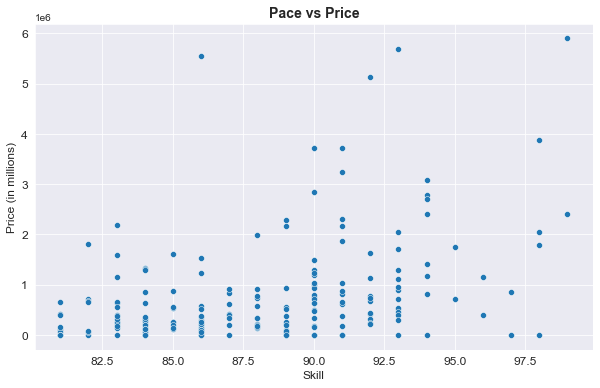

In [145]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Pace', y='PS_Xbox_Price', data=df)
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Price (in millions)', fontsize=12)
plt.title('Pace vs Price', fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\anass.harbouli\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


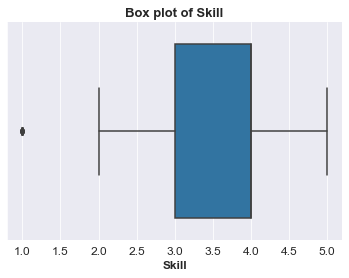

In [146]:
# Plot a box plot of the 'Skill' feature
sns.boxplot(df['Skill'], color='#1f77b4')
plt.xlabel('Skill', fontsize=12, fontweight='bold')
plt.title('Box plot of Skill', fontsize=13, fontweight='bold')
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.show()

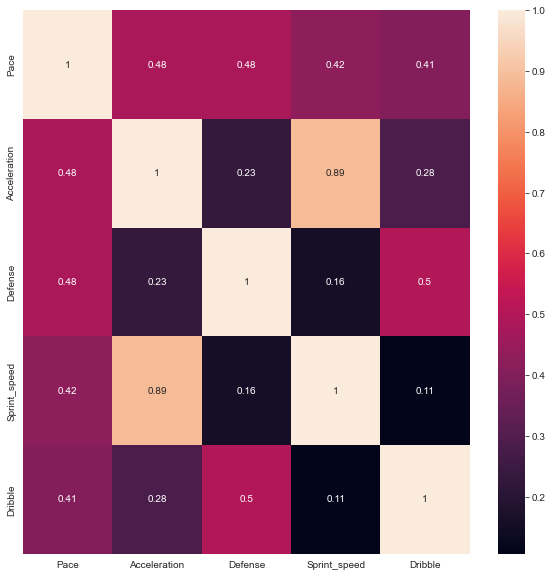

In [155]:
# Calculate the pairwise correlation between features
corr = df.corr()

# Plot a heatmap of the pairwise correlation
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)
plt.show()

# Select the most relevant features
relevant_features = corr[abs(corr['Pace']) > 0.5].index
df_corr = df[relevant_features]

In [160]:
# Select the top 5 features based on their correlation with 'Pace'
top_5_features =corr['Pace'].sort_values(ascending=False).head(5).index
df_corr_top5 = df = df[top_5_features]

In [38]:
df.to_json('Fifa23_Dataset.json', orient='records')

# Thank you